In [1]:
# Credit Card Fraud Detection
# Author: Jennifer Cheng
# Created on Nov 4, 2024



# Install all needed libraries if it is not present

if(!require(tidyverse)) install.packages("tidyverse")
if(!require(kableExtra)) install.packages("kableExtra")
if(!require(tidyr)) install.packages("tidyr")
if(!require(tidyverse)) install.packages("tidyverse")
if(!require(stringr)) install.packages("stringr")
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(gbm)) install.packages("gbm")
if(!require(dplyr)) install.packages("dplyr")
if(!require(caret)) install.packages("caret")
if(!require(xgboost)) install.packages("xgboost")
if(!require(e1071)) install.packages("e1071")
if(!require(class)) install.packages("class")
if(!require(ROCR)) install.packages("ROCR")
if(!require(randomForest)) install.packages("randomForest")
if(!require(PRROC)) install.packages("PRROC")
if(!require(reshape2)) install.packages("reshape2")

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: kableExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘kableExtra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’


Loading required package: gbm

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE

In [7]:
if(!require(xgboost)) install.packages("xgboost")


Loading required package: xgboost

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘xgboost’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# Loading all needed libraries

library(dplyr)
library(tidyverse)
library(kableExtra)
library(tidyr)
library(ggplot2)
library(gbm)
library(caret)
library(xgboost)
library(e1071)
library(class)
#library(lightgbm)
library(ROCR)
library(randomForest)
library(PRROC)
library(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(kableExtra): there is no package called ‘kableExtra’


In [8]:
## Loading the dataset

creditcard <- read.csv("creditcard.csv")

In [9]:
# Check dimensions

data.frame("Length" = nrow(creditcard), "Columns" = ncol(creditcard)) %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

imbalanced <- data.frame(creditcard)

imbalanced$Class = ifelse(creditcard$Class == 0, 'Legal', 'Fraud') %>% as.factor()

<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> Length </th>
   <th style="text-align:right;"> Columns </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 284807 </td>
   <td style="text-align:right;"> 31 </td>
  </tr>
</tbody>
</table>

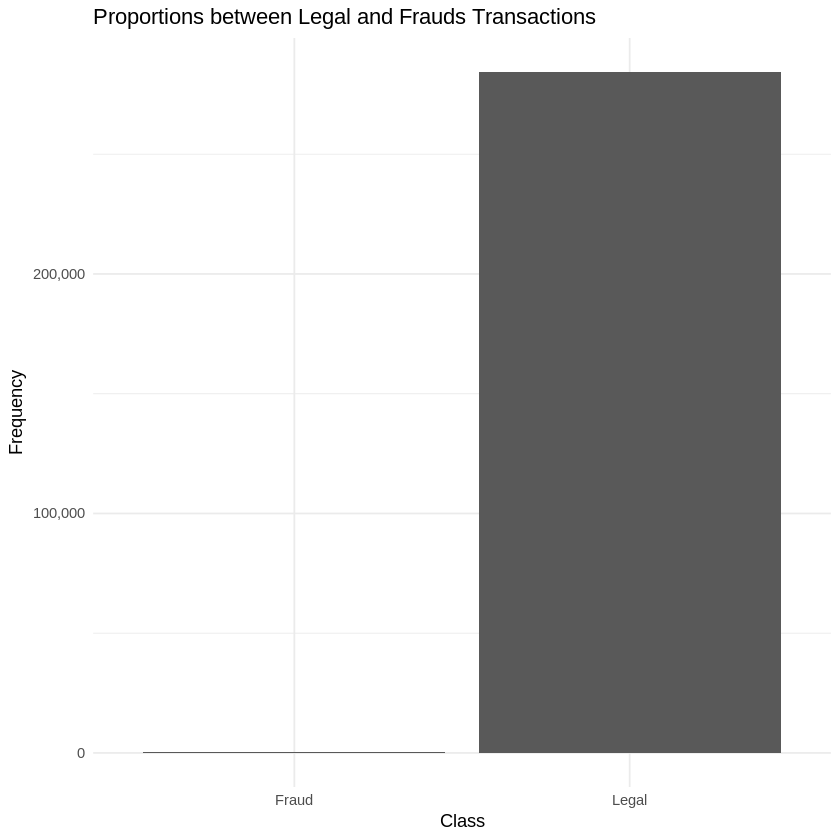

In [10]:
# Visualize the proportion between classes

imbalanced %>%
  ggplot(aes(Class)) +
  theme_minimal()  +
  geom_bar() +
  scale_x_discrete() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Proportions between Legal and Frauds Transactions",
       x = "Class",
       y = "Frequency")

In [11]:
# Find missing values

sapply(creditcard, function(x) sum(is.na(x))) %>%
  kable(col.names = c("Missing Values")) %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">  </th>
   <th style="text-align:right;"> Missing Values </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Time </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V1 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V2 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V3 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V4 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V5 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V6 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>

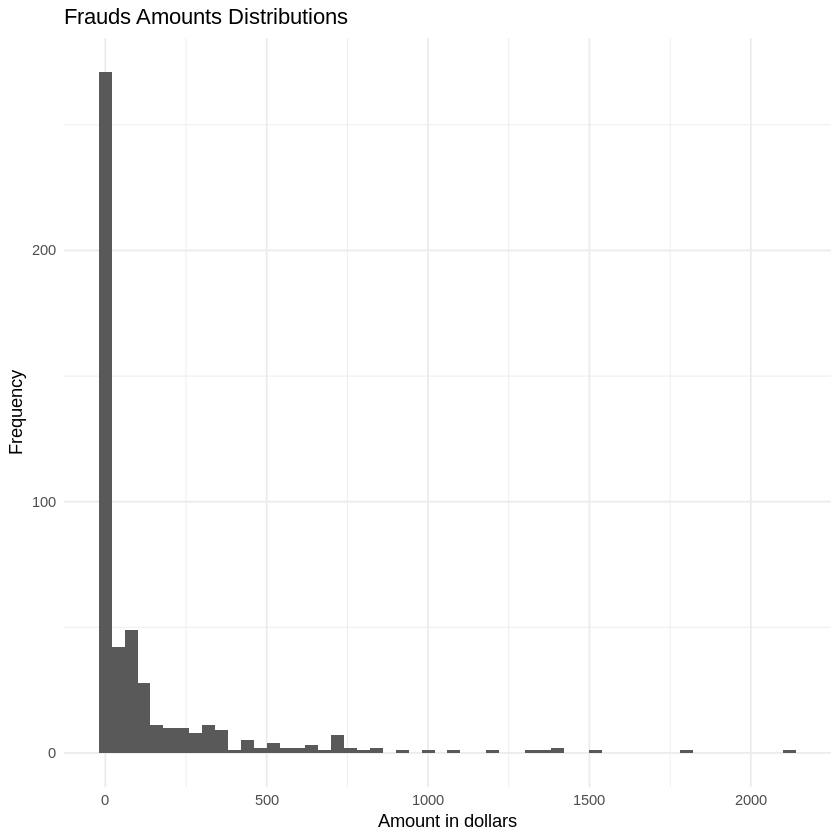

In [12]:
# Frauds Amount

creditcard[creditcard$Class == 1,] %>%
  ggplot(aes(Amount)) +
  theme_minimal()  +
  geom_histogram(binwidth = 40) +
  labs(title = "Frauds Amounts Distributions",
       x = "Amount in dollars",
       y = "Frequency")

In [13]:
creditcard[creditcard$Class == 1,] %>%
  group_by(Amount) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=10) %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)


<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> Amount </th>
   <th style="text-align:right;"> count </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 1.00 </td>
   <td style="text-align:right;"> 113 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 0.00 </td>
   <td style="text-align:right;"> 27 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 99.99 </td>
   <td style="text-align:right;"> 27 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 0.76 </td>
   <td style="text-align:right;"> 17 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 0.77 </td>
   <td style="text-align:right;"> 10 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 0.01 </td>
   <td style="text-align:right;"> 5 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 2.00 </td>
   <td style="text-align:

<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> Time </th>
   <th style="text-align:right;"> count </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 68207 </td>
   <td style="text-align:right;"> 6 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 84204 </td>
   <td style="text-align:right;"> 4 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 85285 </td>
   <td style="text-align:right;"> 4 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 93853 </td>
   <td style="text-align:right;"> 4 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 93860 </td>
   <td style="text-align:right;"> 4 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 93879 </td>
   <td style="text-align:right;"> 4 </td>
  </tr>
  <tr>
   <td style="text-align:right;"> 94362 </td>
   <td style="text-align:ri

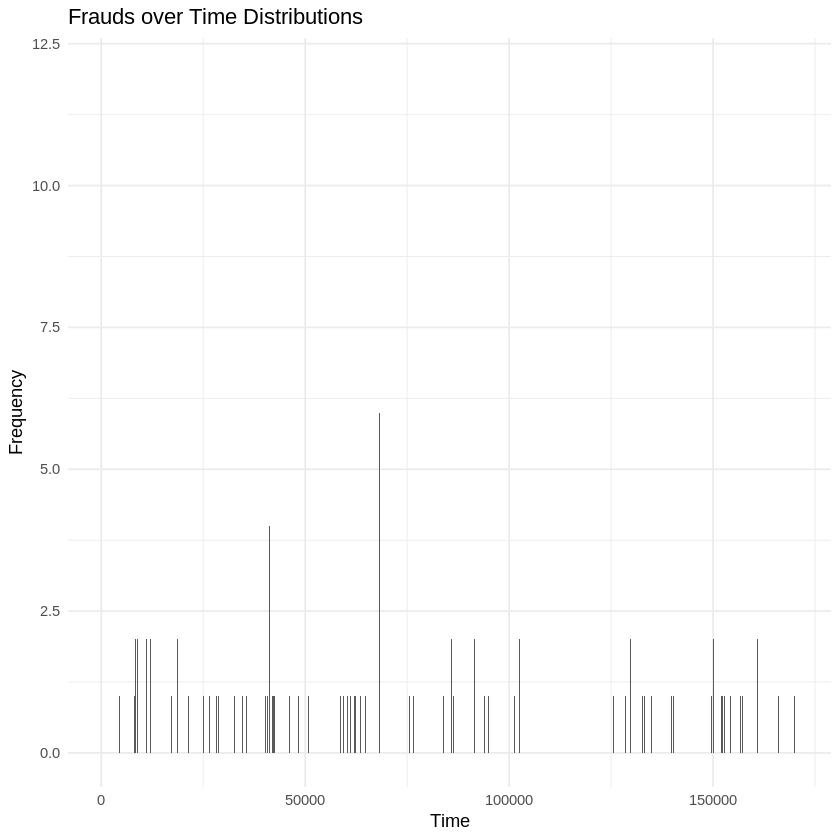

In [14]:

# Frauds over Time

creditcard[creditcard$Class == 1,] %>%
  ggplot(aes(Time)) +
  theme_minimal()  +
  geom_histogram(binwidth = 40) +
  labs(title = "Frauds over Time Distributions",
       x = "Time",
       y = "Frequency")

creditcard[creditcard$Class == 1,] %>%
  group_by(Time) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=10) %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

In [15]:

# Get lower triangle of the correlation matrix

get_lower_tri<-function(cormat){
  cormat[upper.tri(cormat)] <- NA
  return(cormat)
}

In [16]:
# Get upper triangle of the correlation matrix

get_upper_tri <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}

In [17]:

reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd)
  cormat <-cormat[hc$order, hc$order]
}

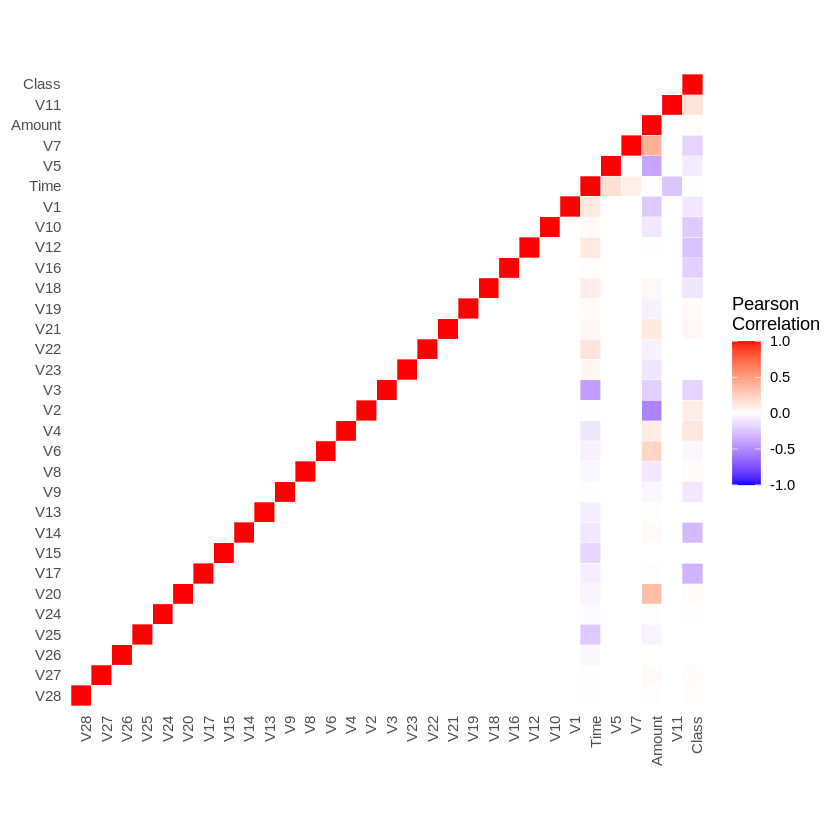

In [18]:

corr_matrix <- round(cor(creditcard),2)
corr_matrix <- reorder_cormat(corr_matrix)

upper_tri <- get_upper_tri(corr_matrix)

melted_corr_matrix <- melt(upper_tri, na.rm = TRUE)


ggplot(melted_corr_matrix, aes(Var2, Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 1,
                                   size = 9, hjust = 1), axis.text.y = element_text(size = 9),                    axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        axis.ticks = element_blank()) +
  coord_fixed()

In [19]:

# Set seed for reproducibility

set.seed(1234)

In [20]:

# Remove the "Time" column from the dataset

creditcard$Class <- as.factor(creditcard$Class)
creditcard <- creditcard %>% select(-Time)

In [21]:

# Split the dataset into train, test dataset and cv

train_index <- createDataPartition(
  y = creditcard$Class,
  p = .6,
  list = F
)

train <- creditcard[train_index,]

test_cv <- creditcard[-train_index,]

test_index <- createDataPartition(
  y = test_cv$Class,
  p = .5,
  list = F)

test <- test_cv[test_index,]
cv <- test_cv[-test_index,]

rm(train_index, test_index, test_cv)

In [22]:

# Create a baseline model that predict always "legal"
# (aka "0") transactions and compute all metrics

# Clone the creditcard dataframe

baseline_model <- data.frame(creditcard)

# Set Class al to Legal (0)

baseline_model$Class = factor(0, c(0,1))

In [23]:

# Make predictions

pred <- prediction(
  as.numeric(as.character(baseline_model$Class)), as.numeric(as.character(creditcard$Class))
)

In [24]:

# Compute the AUC and AUCPR

auc_val_baseline <- performance(pred, "auc")
auc_plot_baseline <- performance(pred, 'sens', 'spec')
aucpr_plot_baseline <- performance(pred, "prec", "rec")

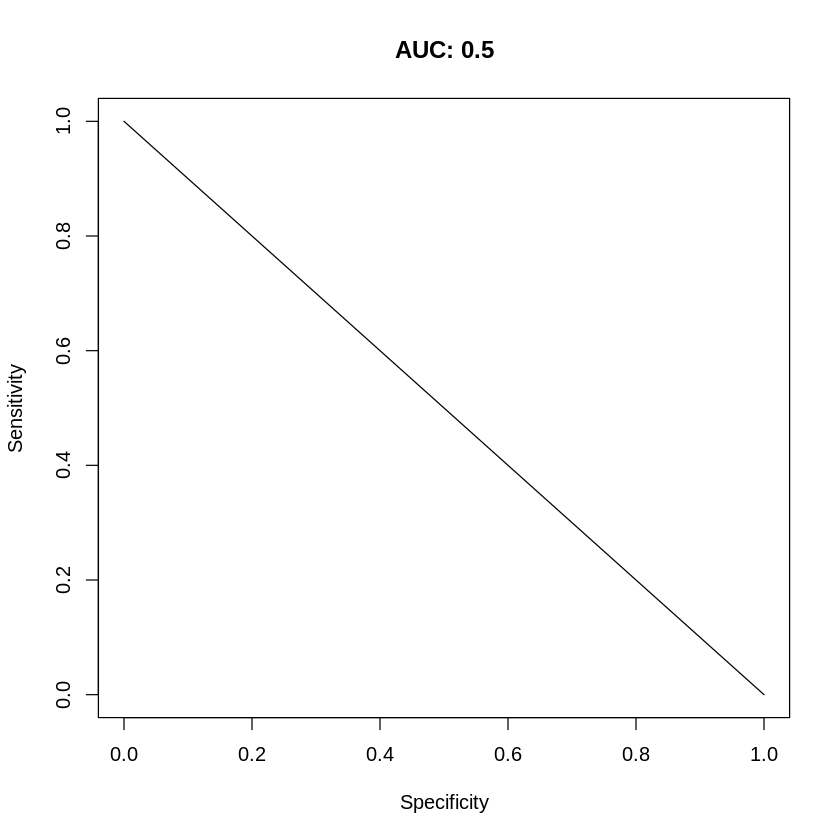

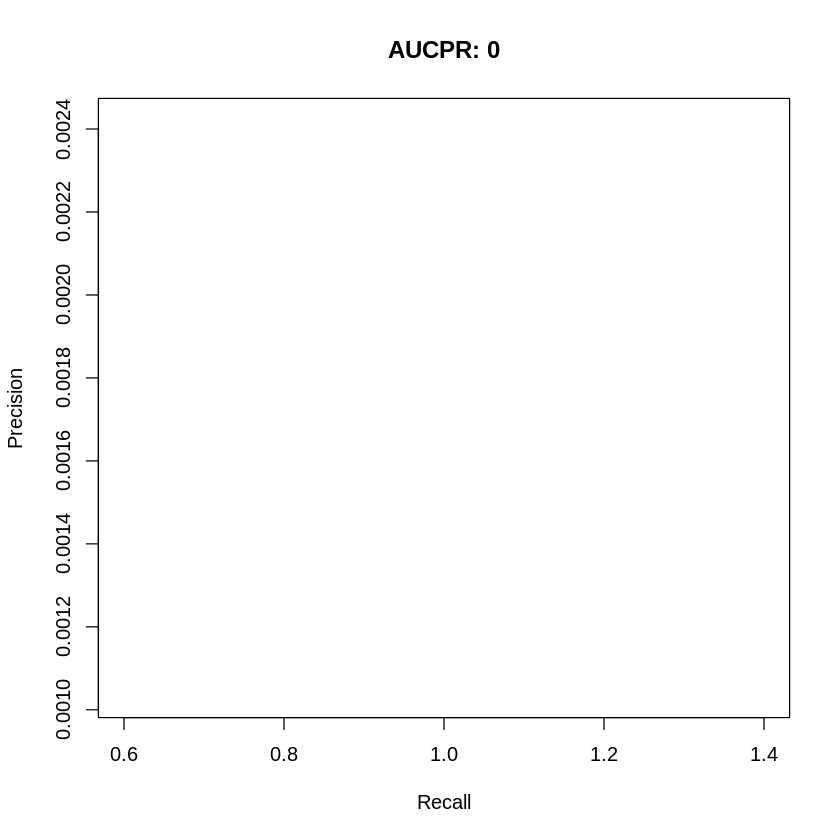

In [25]:

# Make the relative plot

plot(auc_plot_baseline,
     main=paste("AUC:",
                auc_val_baseline@y.values[[1]])
)

plot(aucpr_plot_baseline, main="AUCPR: 0")

In [26]:

# Create a dataframe 'results' that contains all metrics
# obtained by the trained models

results <- data.frame(
  Model = "Naive Baseline - Predict Always Legal",
  AUC = auc_val_baseline@y.values[[1]],
  AUCPR = 0
)

In [27]:

# Show results on a table

results %>%
  kable() %>%
  kable_styling(
    bootstrap_options =
      c("striped", "hover", "condensed", "responsive"),
    position = "center",
    font_size = 10,
    full_width = FALSE
  )

<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> Model </th>
   <th style="text-align:right;"> AUC </th>
   <th style="text-align:right;"> AUCPR </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Naive Baseline - Predict Always Legal </td>
   <td style="text-align:right;"> 0.5 </td>
   <td style="text-align:right;"> 0 </td>
  </tr>
</tbody>
</table>

In [28]:
# Create a Naive Bayes Model, it will improve a little bit the
# results in AUC and AUCPR

# Set seed 1234 for reproducibility

set.seed(1234)

# Build the model with Class as target and all other variables
# as predictors

naive_model <- naiveBayes(Class ~ ., data = train, laplace=1)

In [29]:

# Predict

predictions <- predict(naive_model, newdata=test)

# Compute the AUC and AUCPR for the Naive Model

pred <- prediction(as.numeric(predictions) , test$Class)

auc_val_naive <- performance(pred, "auc")

auc_plot_naive <- performance(pred, 'sens', 'spec')
aucpr_plot_naive <- performance(pred, "prec", "rec")

aucpr_val_naive <- pr.curve(
  scores.class0 = predictions[test$Class == 1],
  scores.class1 = predictions[test$Class == 0],
  curve = T,
  dg.compute = T
)

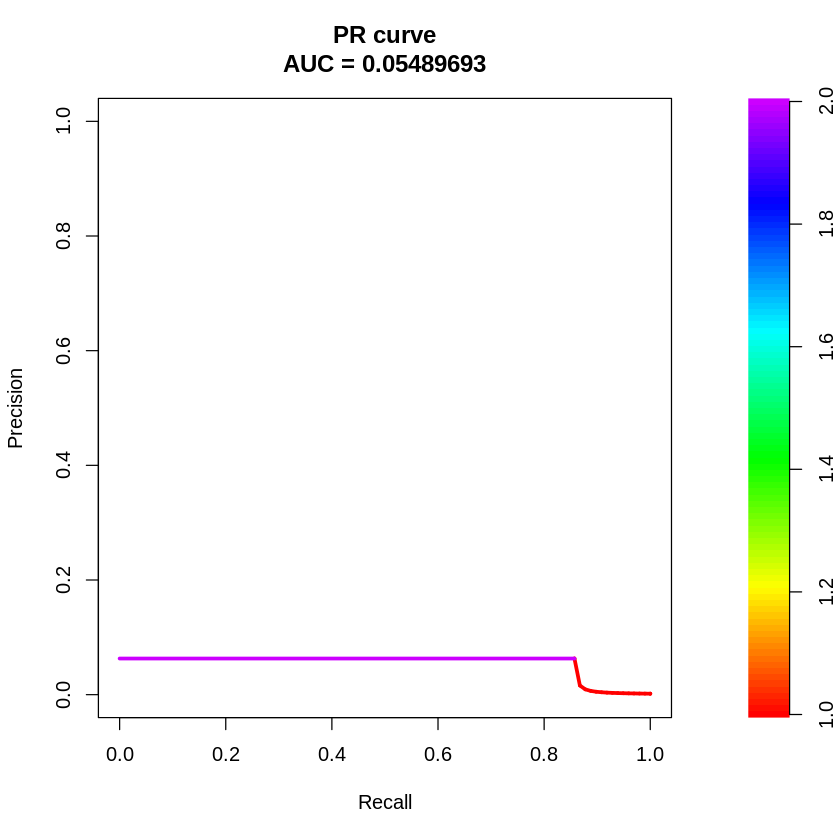

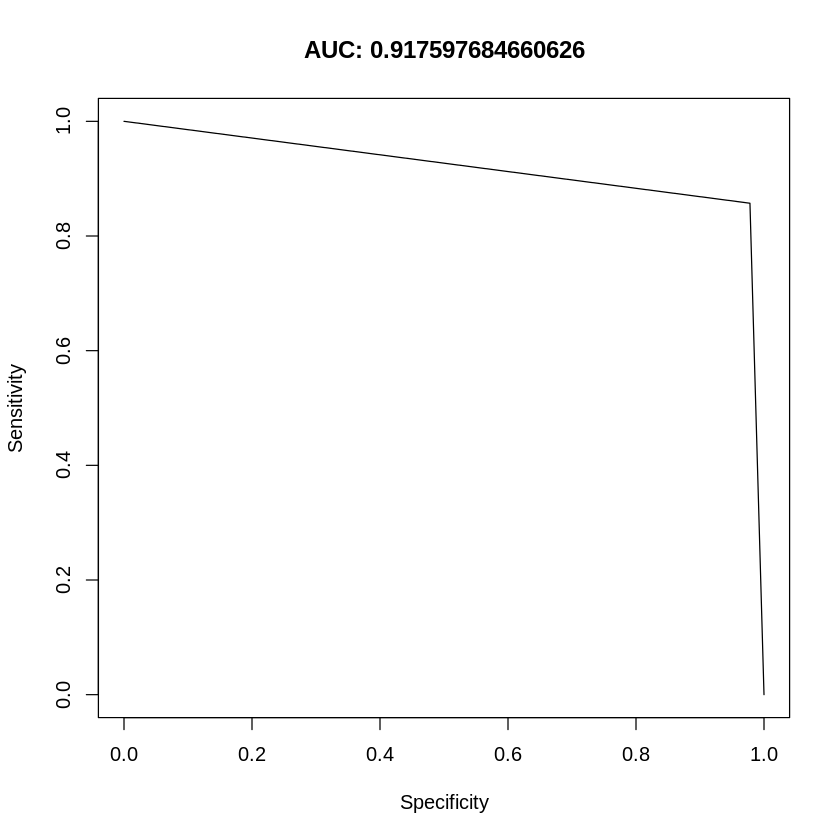

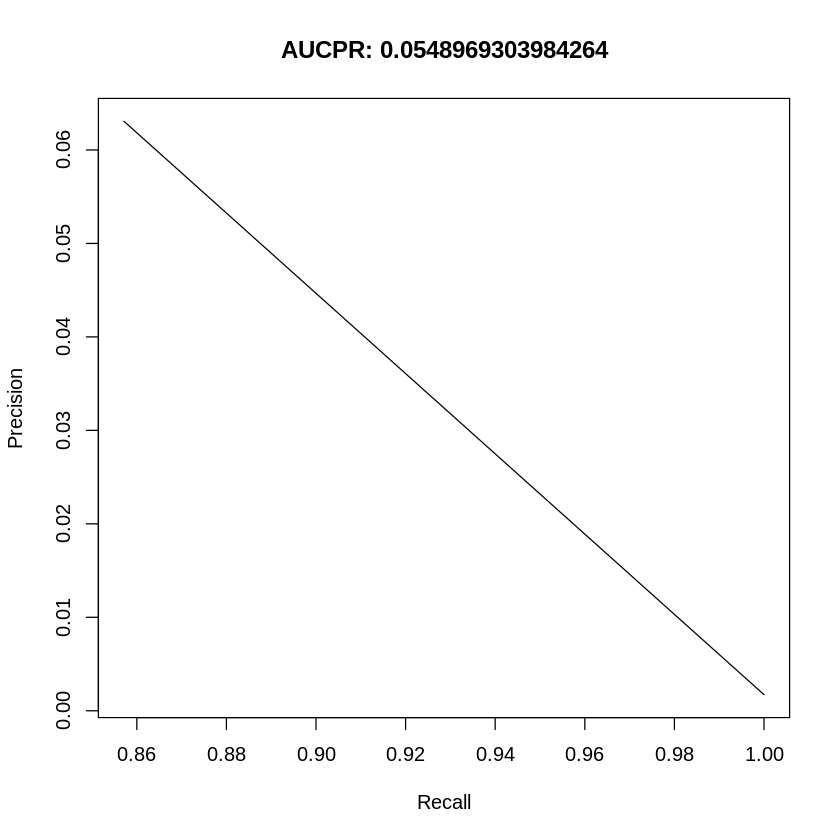

In [30]:
# Make the relative plot

plot(aucpr_val_naive)
plot(auc_plot_naive, main=paste("AUC:", auc_val_naive@y.values[[1]]))
plot(aucpr_plot_naive, main=paste("AUCPR:", aucpr_val_naive$auc.integral))


In [31]:

# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "Naive Bayes",
  AUC = auc_val_naive@y.values[[1]],
  AUCPR = aucpr_val_naive$auc.integral
)

In [32]:

# Show results on a table

results %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> Model </th>
   <th style="text-align:right;"> AUC </th>
   <th style="text-align:right;"> AUCPR </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Naive Baseline - Predict Always Legal </td>
   <td style="text-align:right;"> 0.5000000 </td>
   <td style="text-align:right;"> 0.0000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Naive Bayes </td>
   <td style="text-align:right;"> 0.9175977 </td>
   <td style="text-align:right;"> 0.0548969 </td>
  </tr>
</tbody>
</table>

In [33]:

# Set seed 1234 for reproducibility

set.seed(1234)

# Build a KNN Model with Class as Target and all other
# variables as predictors. k is set to 5

knn_model <- knn(train[,-30], test[,-30], train$Class, k=5, prob = TRUE)

# Compute the AUC and AUCPR for the KNN Model

pred <- prediction(
  as.numeric(as.character(knn_model)), as.numeric(as.character(test$Class))
)

auc_val_knn <- performance(pred, "auc")

auc_plot_knn <- performance(pred, 'sens', 'spec')
aucpr_plot_knn <- performance(pred, "prec", "rec")

aucpr_val_knn <- pr.curve(
  scores.class0 = knn_model[test$Class == 1],
  scores.class1 = knn_model[test$Class == 0],
  curve = T,
  dg.compute = T
)

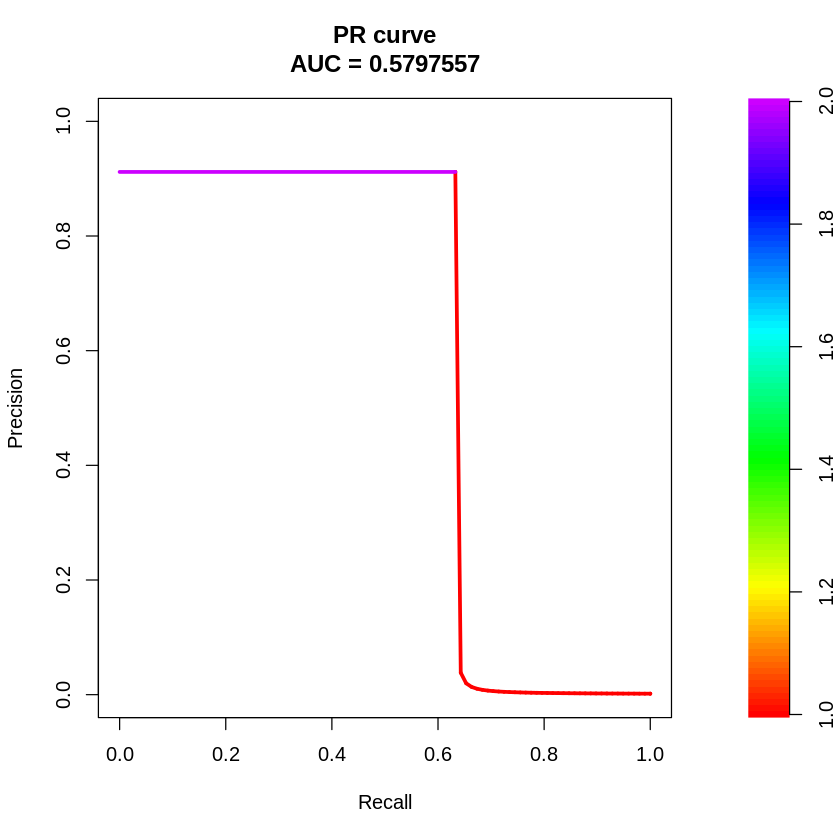

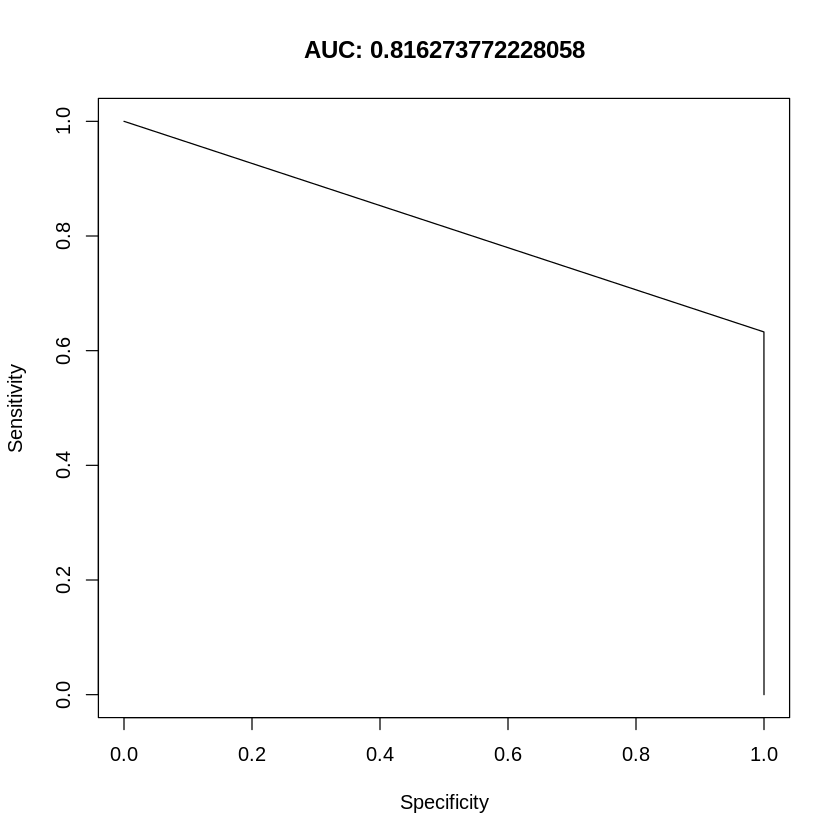

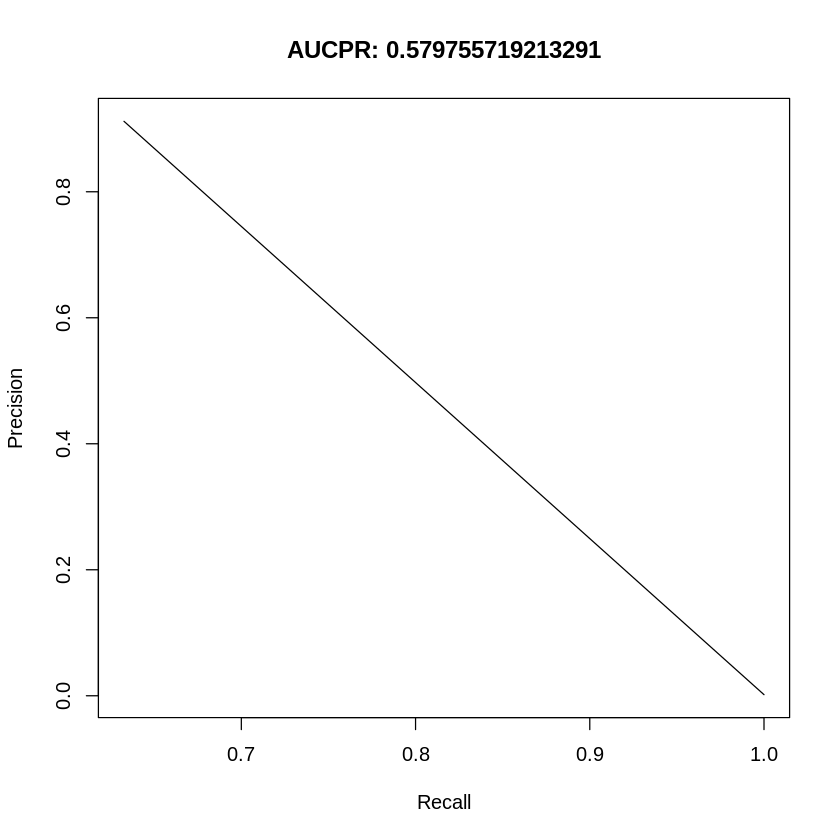

In [34]:

# Make the relative plot

plot(aucpr_val_knn)
plot(auc_plot_knn, main=paste("AUC:", auc_val_knn@y.values[[1]]))
plot(aucpr_plot_knn, main=paste("AUCPR:", aucpr_val_knn$auc.integral))


In [35]:
# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "K-Nearest Neighbors k=5",
  AUC = auc_val_knn@y.values[[1]],
  AUCPR = aucpr_val_knn$auc.integral
)

In [36]:

# Show results on a table

results %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)


<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> Model </th>
   <th style="text-align:right;"> AUC </th>
   <th style="text-align:right;"> AUCPR </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Naive Baseline - Predict Always Legal </td>
   <td style="text-align:right;"> 0.5000000 </td>
   <td style="text-align:right;"> 0.0000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Naive Bayes </td>
   <td style="text-align:right;"> 0.9175977 </td>
   <td style="text-align:right;"> 0.0548969 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> K-Nearest Neighbors k=5 </td>
   <td style="text-align:right;"> 0.8162738 </td>
   <td style="text-align:right;"> 0.5797557 </td>
  </tr>
</tbody>
</table>

In [37]:

# Set seed 1234 for reproducibility

set.seed(1234)

# Build a SVM Model with Class as Target and all other
# variables as predictors. The kernel is set to sigmoid

svm_model <- svm(Class ~ ., data = train, kernel='sigmoid')

# Make predictions based on this model

predictions <- predict(svm_model, newdata=test)

# Compute AUC and AUCPR

pred <- prediction(
  as.numeric(as.character(predictions)),                                 as.numeric(as.character(test$Class))
)

auc_val_svm <- performance(pred, "auc")

auc_plot_svm <- performance(pred, 'sens', 'spec')
aucpr_plot_svm <- performance(pred, "prec", "rec")

aucpr_val_svm <- pr.curve(
  scores.class0 = predictions[test$Class == 1],
  scores.class1 = predictions[test$Class == 0],
  curve = T,
  dg.compute = T
)


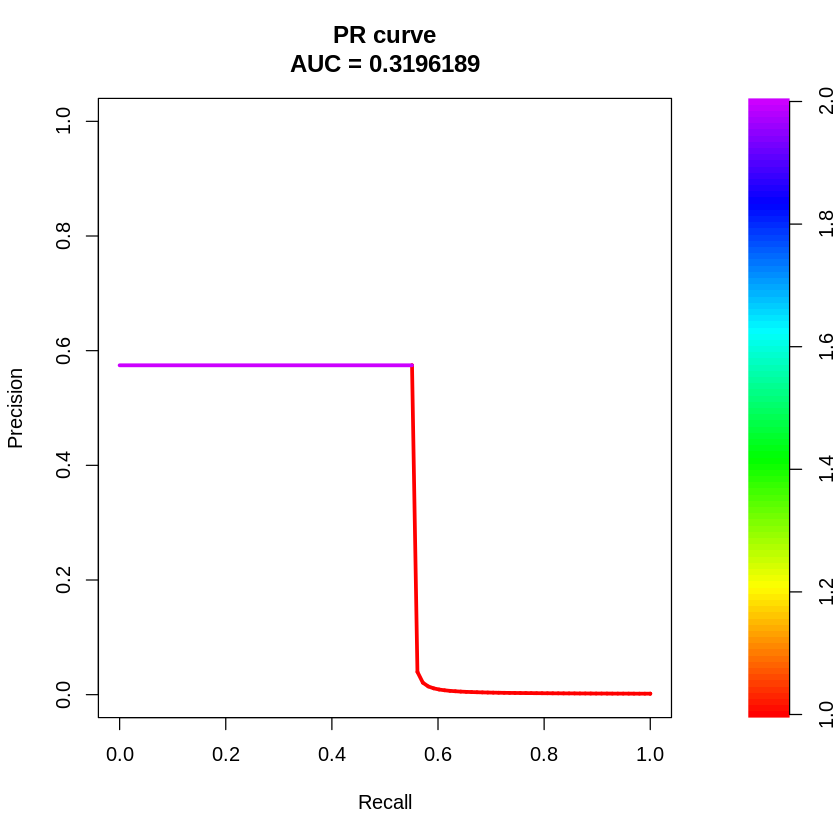

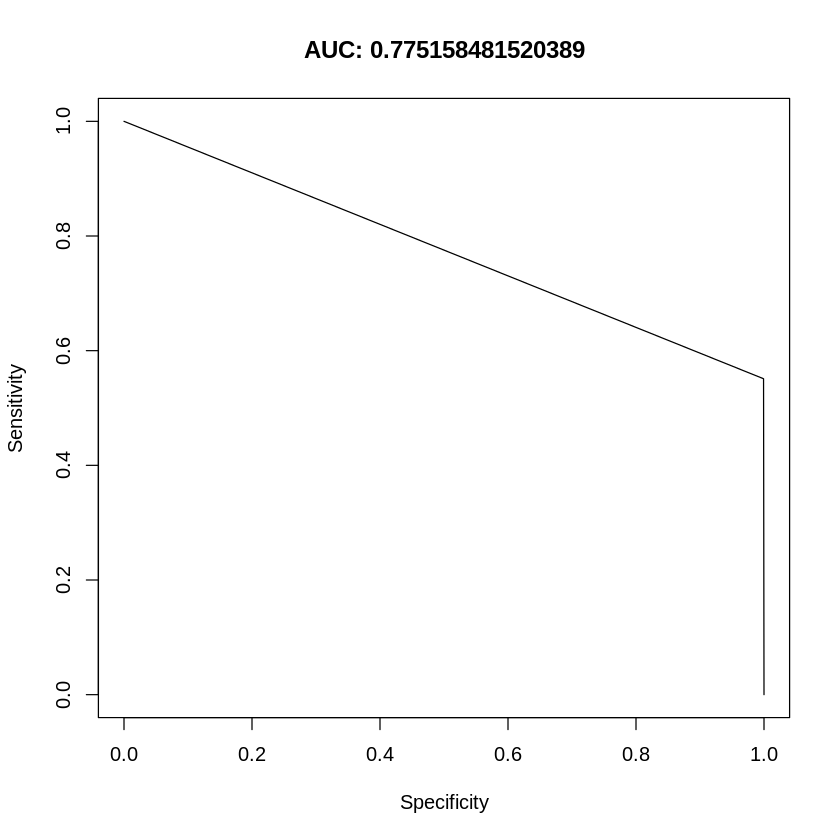

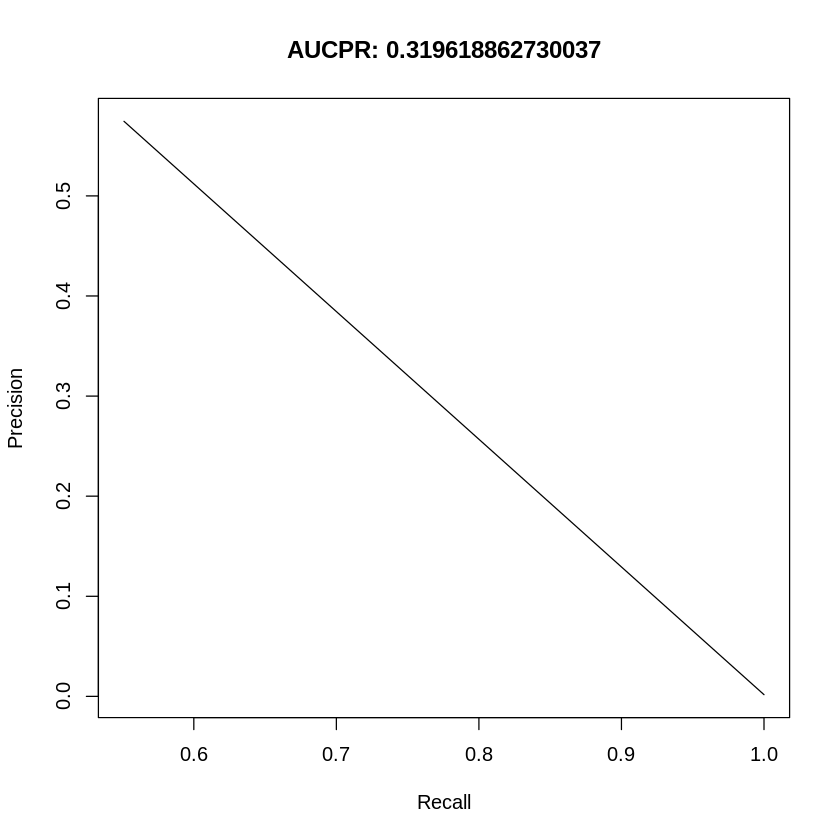

In [38]:

# Make the relative plot

plot(aucpr_val_svm)
plot(auc_plot_svm, main=paste("AUC:", auc_val_svm@y.values[[1]]))
plot(aucpr_plot_svm, main=paste("AUCPR:", aucpr_val_svm$auc.integral))

In [39]:
# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "SVM - Support Vector Machine",
  AUC = auc_val_svm@y.values[[1]],
  AUCPR = aucpr_val_svm$auc.integral)

In [40]:

# Show results on a table

results %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> Model </th>
   <th style="text-align:right;"> AUC </th>
   <th style="text-align:right;"> AUCPR </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Naive Baseline - Predict Always Legal </td>
   <td style="text-align:right;"> 0.5000000 </td>
   <td style="text-align:right;"> 0.0000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Naive Bayes </td>
   <td style="text-align:right;"> 0.9175977 </td>
   <td style="text-align:right;"> 0.0548969 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> K-Nearest Neighbors k=5 </td>
   <td style="text-align:right;"> 0.8162738 </td>
   <td style="text-align:right;"> 0.5797557 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> SVM - Support Vector Machine </td>
   <td style="text-align:right;"> 0.7751585

In [41]:

# Set seed 1234 for reproducibility

set.seed(1234)

In [42]:
# Build a Random Forest Model with Class as Target and all other
# variables as predictors. The number of trees is set to 500

rf_model <- randomForest(Class ~ ., data = train, ntree = 500)

# Get the feature importance

feature_imp_rf <- data.frame(importance(rf_model))

In [43]:
# Make predictions based on this model

predictions <- predict(rf_model, newdata=test)

# Compute the AUC and AUPCR

pred <- prediction(
  as.numeric(as.character(predictions)), as.numeric(as.character(test$Class))
)

auc_val_rf <- performance(pred, "auc")

auc_plot_rf <- performance(pred, 'sens', 'spec')

aucpr_plot_rf <- performance(pred, "prec", "rec", curve = T,  dg.compute = T)

aucpr_val_rf <- pr.curve(scores.class0 = predictions[test$Class == 1], scores.class1 = predictions[test$Class == 0],curve = T,  dg.compute = T)


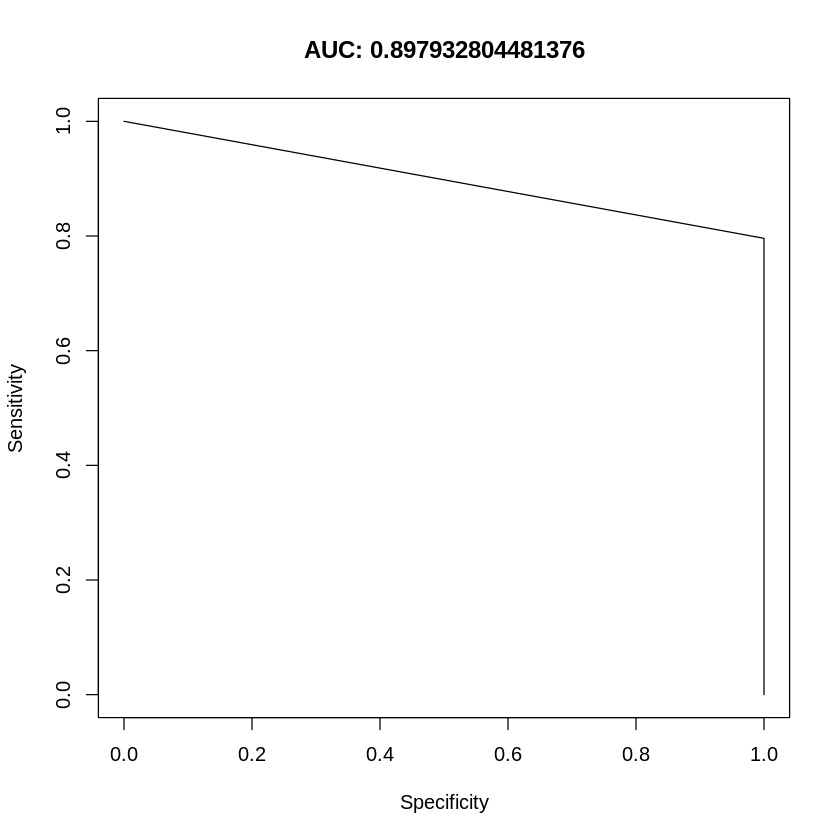

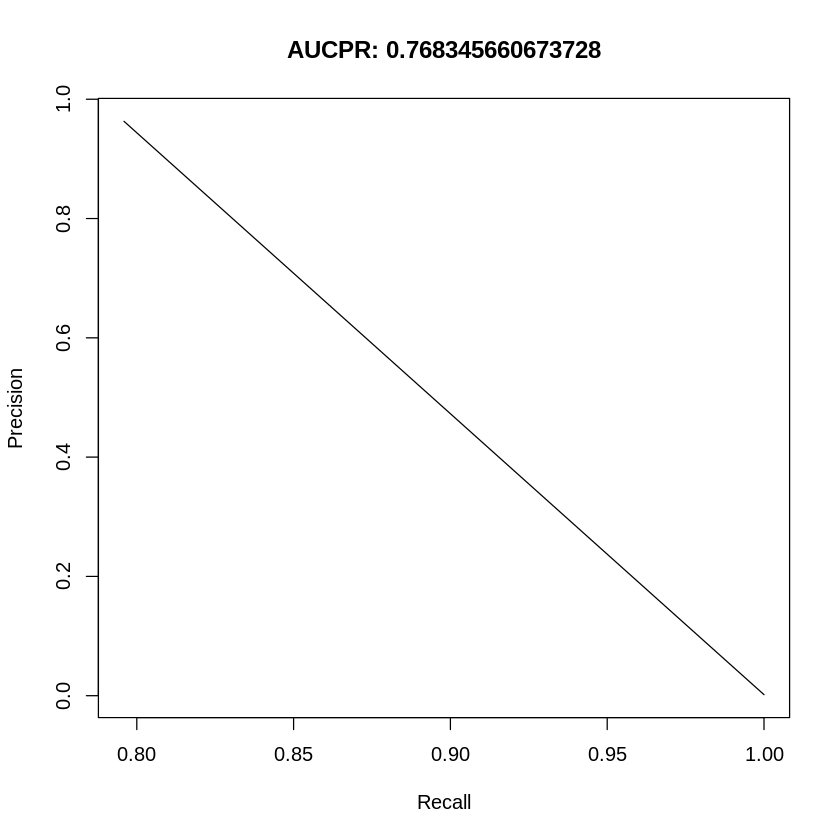

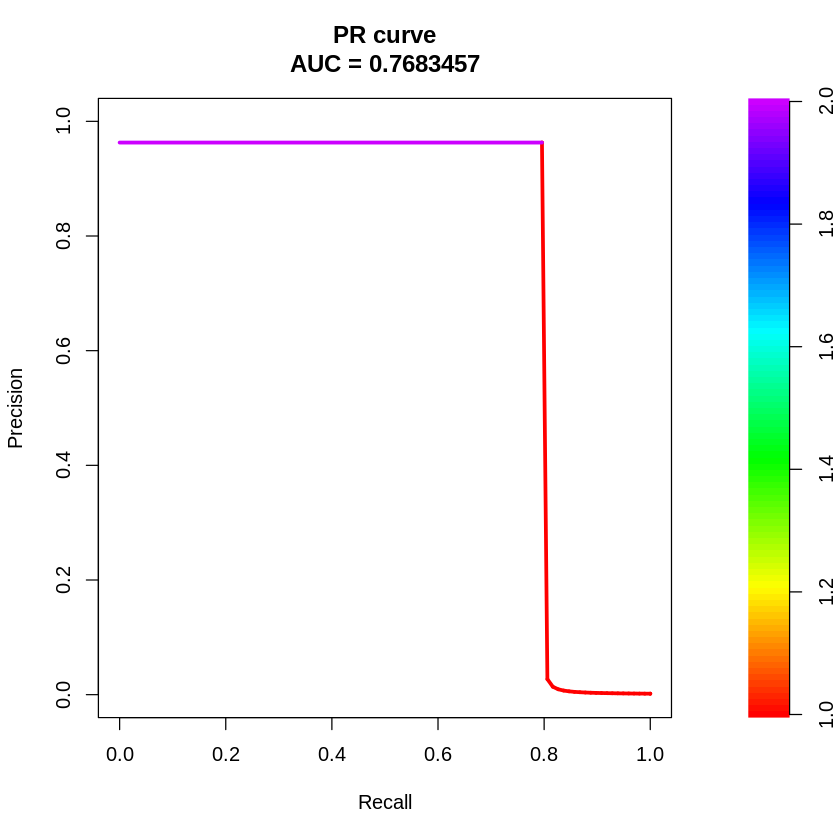

In [44]:
# make the relative plot

plot(auc_plot_rf, main=paste("AUC:", auc_val_rf@y.values[[1]]))
plot(aucpr_plot_rf, main=paste("AUCPR:", aucpr_val_rf$auc.integral))
plot(aucpr_val_rf)

In [45]:
# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "Random Forest",
  AUC = auc_val_rf@y.values[[1]],
  AUCPR = aucpr_val_rf$auc.integral)

In [46]:
# Show results on a table

results %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)


<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> Model </th>
   <th style="text-align:right;"> AUC </th>
   <th style="text-align:right;"> AUCPR </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Naive Baseline - Predict Always Legal </td>
   <td style="text-align:right;"> 0.5000000 </td>
   <td style="text-align:right;"> 0.0000000 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Naive Bayes </td>
   <td style="text-align:right;"> 0.9175977 </td>
   <td style="text-align:right;"> 0.0548969 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> K-Nearest Neighbors k=5 </td>
   <td style="text-align:right;"> 0.8162738 </td>
   <td style="text-align:right;"> 0.5797557 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> SVM - Support Vector Machine </td>
   <td style="text-align:right;"> 0.7751585

In [47]:

# Show feature importance on a table

feature_imp_rf %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed", "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

<table class="table table-striped table-hover table-condensed table-responsive" style="font-size: 10px; width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;">  </th>
   <th style="text-align:right;"> MeanDecreaseGini </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> V1 </td>
   <td style="text-align:right;"> 8.708982 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V2 </td>
   <td style="text-align:right;"> 7.784292 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V3 </td>
   <td style="text-align:right;"> 8.985490 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V4 </td>
   <td style="text-align:right;"> 17.257080 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V5 </td>
   <td style="text-align:right;"> 7.772203 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V6 </td>
   <td style="text-align:right;"> 8.821890 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> V7 </td>
   <td

In [1]:

# Set seet 1234 for reproducibility

set.seed(1234)

In [2]:
# # Build a GBM Model with Class as Target and all other
# # variables as predictors. Distribution is bernoully,
# # number of tree is 500

# gbm_model <- gbm(as.character(Class) ~ .,
#                  distribution = "bernoulli",
#                  data = rbind(train, test),
#                  n.trees = 500,
#                  interaction.depth = 3,
#                  n.minobsinnode = 100,
#                  shrinkage = 0.01,
#                  train.fraction = 0.7,
# )

# # Determine the best iteration based on test data

# best_iter = gbm.perf(gbm_model, method = "test")

ERROR: Error in gbm(as.character(Class) ~ ., distribution = "bernoulli", data = rbind(train, : could not find function "gbm"


In [ ]:
# # Make predictions based on this model

# predictions = predict.gbm(
#   gbm_model,
#   newdata = test,
#   n.trees = best_iter,
#   type="response"
# )

# # Get feature importance

# feature_imp_gbm = summary(gbm_model, n.trees = best_iter)

# # Compute the AUC and AUPCR

# pred <- prediction(
#   as.numeric(as.character(predictions)), as.numeric(as.character(test$Class))
# )

# auc_val_gbm <- performance(pred, "auc")

# auc_plot_gbm <- performance(pred, 'sens', 'spec')
# aucpr_plot_gbm <- performance(pred, "prec", "rec")

# aucpr_val_gbm <- pr.curve(
#   scores.class0 = predictions[test$Class == 1],
#   scores.class1 = predictions[test$Class == 0],
#   curve = T,
#   dg.compute = T
# )


In [ ]:
# # Make the relative plot

# plot(aucpr_val_gbm)
# plot(auc_plot_gbm, main=paste("AUC:", auc_val_gbm@y.values[[1]]))
# plot(aucpr_plot_gbm, main=paste("AUCPR:", aucpr_val_gbm$auc.integral))

# # Adding the respective metrics to the results dataset

# results <- results %>% add_row(
#   Model = "GBM - Generalized Boosted Regression",
#   AUC = auc_val_gbm@y.values[[1]],
#   AUCPR = aucpr_val_gbm$auc.integral)


In [4]:
# # Show results on a table

# results %>%
#   kable() %>%
#   kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
#                 position = "center",
#                 font_size = 10,
#                 full_width = FALSE)

# # Show feature importance on a table

# feature_imp_gbm %>%
#   kable() %>%
#   kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
#                 position = "center",
#                 font_size = 10,
#                 full_width = FALSE)


# Set seet 1234 for reproducibility

set.seed(1234)

In [5]:
# Prepare the training dataset

xgb_train <- xgb.DMatrix(
  as.matrix(train[, colnames(train) != "Class"]),
  label = as.numeric(as.character(train$Class))
)

# Prepare the test dataset

xgb_test <- xgb.DMatrix(
  as.matrix(test[, colnames(test) != "Class"]),
  label = as.numeric(as.character(test$Class))
)

# Prepare the cv dataset

xgb_cv <- xgb.DMatrix(
  as.matrix(cv[, colnames(cv) != "Class"]),
  label = as.numeric(as.character(cv$Class))
)

ERROR: Error in xgb.DMatrix(as.matrix(train[, colnames(train) != "Class"]), label = as.numeric(as.character(train$Class))): could not find function "xgb.DMatrix"


In [ ]:

# Prepare the parameters list.

xgb_params <- list(
  objective = "binary:logistic",
  eta = 0.1,
  max.depth = 3,
  nthread = 6,
  eval_metric = "aucpr"
)

In [3]:

# Train the XGBoost Model

xgb_model <- xgb.train(
  data = xgb_train,
  params = xgb_params,
  watchlist = list(test = xgb_test, cv = xgb_cv),
  nrounds = 500,
  early_stopping_rounds = 40,
  print_every_n = 20
)

ERROR: Error in xgb.train(data = xgb_train, params = xgb_params, watchlist = list(test = xgb_test, : could not find function "xgb.train"


In [ ]:

# Get feature importance

feature_imp_xgb <- xgb.importance(colnames(train), model = xgb_model)

xgb.plot.importance(feature_imp_xgb, rel_to_first = TRUE, xlab = "Relative importance")

# Make predictions based on this model

predictions = predict(
  xgb_model,
  newdata = as.matrix(test[, colnames(test) != "Class"]),
  ntreelimit = xgb_model$bestInd
)

# Compute the AUC and AUPCR

pred <- prediction(
  as.numeric(as.character(predictions)),                                 as.numeric(as.character(test$Class))
)

auc_val_xgb <- performance(pred, "auc")

auc_plot_xgb <- performance(pred, 'sens', 'spec')
aucpr_plot_xgb <- performance(pred, "prec", "rec")

aucpr_val_xgb <- pr.curve(
  scores.class0 = predictions[test$Class == 1],
  scores.class1 = predictions[test$Class == 0],
  curve = T,
  dg.compute = T
)

In [ ]:
# Make the relative plot

plot(auc_plot_xgb, main=paste("AUC:", auc_val_xgb@y.values[[1]]))
plot(aucpr_plot_xgb, main=paste("AUCPR:", aucpr_val_xgb$auc.integral))
plot(aucpr_val_xgb)

# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "XGBoost",
  AUC = auc_val_xgb@y.values[[1]],
  AUCPR = aucpr_val_xgb$auc.integral)

# Show results on a table

results %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

# Show feature importance on a table

feature_imp_xgb %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

# Set seet 1234 for reproducibility

set.seed(1234)

In [ ]:
# Prepare the training dataset

lgb_train <- lgb.Dataset(
  as.matrix(train[, colnames(train) != "Class"]),
  label = as.numeric(as.character(train$Class))
)

# Prepare the test dataset

lgb_test <- lgb.Dataset(
  as.matrix(test[, colnames(test) != "Class"]),
  label = as.numeric(as.character(test$Class))
)

In [ ]:

# Prepare the cvtaset

lgb_cv <- lgb.Dataset(
  as.matrix(cv[, colnames(cv) != "Class"]),
  label = as.numeric(as.character(cv$Class))
)

# Prepare the parameters list

lgb_params = list(
  objective = "binary",
  metric = "binary_error"
)

In [ ]:

# # Train the LightGBM Model

# lgb_model <- lgb.train(
#   params = lgb_params,
#   data = lgb_train,
#   valids = list(test = lgb_test, cv = lgb_cv),
#   learning_rate = 0.01,
#   nrounds = 500,
#   early_stopping_rounds = 40,
#   eval_freq = 20
# )


In [ ]:

# # Get feature importance

# feature_imp_lgb = lgb.importance(lgb_model, percentage = TRUE)

# # Make predictions based on this model

# predictions = predict(
#   lgb_model,
#   data = as.matrix(test[, colnames(test) != "Class"]),
#   n = lgb_model$best_iter)

# # Compute the AUC and AUPCR

# pred <- prediction(
#   predictions,
#   as.numeric(as.character(test$Class))
# )

# auc_val_lgb <- performance(pred, "auc")

# auc_plot_lgb <- performance(pred, 'sens', 'spec')
# aucpr_plot_lgb <- performance(pred, "prec", "rec")

# aucpr_val_lgb <- pr.curve(
#   scores.class0 = predictions[test$Class == 1],
#   scores.class1 = predictions[test$Class == 0],
#   curve = T,
#   dg.compute = T
# )

In [ ]:

# # Make the relative plot

# plot(aucpr_val_lgb)
# plot(auc_plot_lgb, main=paste("AUC:", auc_val_lgb@y.values[[1]]))
# plot(aucpr_plot_lgb, main=paste("AUCPR:", aucpr_val_lgb$auc.integral))

# # Adding the respective metrics to the results dataset

# results <- results %>% add_row(
#   Model = "LightGBM",
#   AUC = auc_val_lgb@y.values[[1]],
#   AUCPR = aucpr_val_lgb$auc.integral
# )

# # Show results on a table

# results %>%
#   kable() %>%
#   kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
#                 position = "center",
#                 font_size = 10,
#                 full_width = FALSE)

# feature_imp_lgb %>%
#   kable() %>%
#   kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
#                 position = "center",
#                 font_size = 10,
#                 full_width = FALSE)